<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Deep_learning_school/Part8 - HW/14. Домашнее задание. Решение ML-задачи и kaggle/train.csv')

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [8]:
# Посмотрите, есть ли в датасете незаполненные значения (nan'ы)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
# количеством nan в каждой колонке
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### ОТВЕТ
Когда я попыталась построить гистограммы для числовых признаков, Колаб выдавал ошибку. Я проверила и оказалось, что у признака `TotalSpent` не числовые типы  данных. Соответсвенно, первоначально, я преобразовала его в числовой тип данных. Но не всё так просто: команда не сработала, потому что столбец ` TotalSpent ` сожержит пустые значения (" ").Посмотрим на эти пустые значения:




In [10]:
data[data.TotalSpent == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


По таблице выше мы видем что для при `TotalSpent` == ' ', значения `ClentsPeriod` равняется нулю. Логично предположить, что эти 9 клиентов на данный момент не успели использовать все услушги в течение месяца (`MonthlySpending` != 0). Поэтому я в ручную задала для данных клиентов значение `MonthlySpending` равным еденице, а `TotalSpent` равным их `MonthlySpending`.

In [11]:
data['TotalSpent'] = data['TotalSpent'].mask(data.ClientPeriod == 0, data.MonthlySpending)
data['ClientPeriod'] = data['ClientPeriod'].mask(data.ClientPeriod == 0, 1)

Теперь можно перевести данные признака к нужному типу: 

In [12]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

*Для численных призанков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)).*

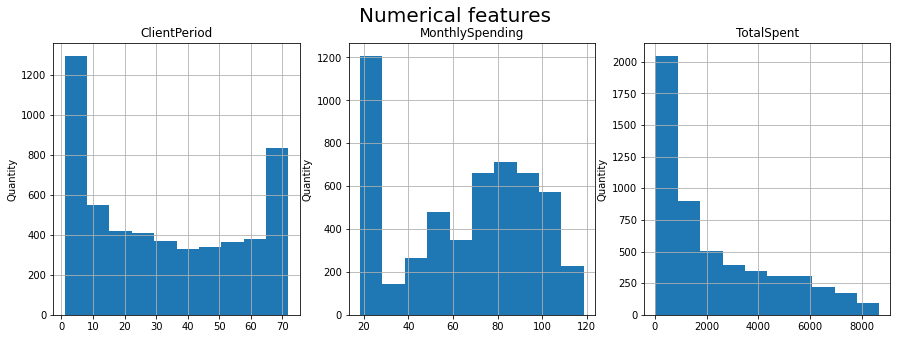

In [13]:
# YOUR CODE

fig, axis = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Numerical features \n\n', fontsize=20)
for i, col in enumerate(num_cols):
  axis[i].hist(data[col])
  axis[i].set_title(col)
  axis[i].grid()
  axis[i].set_ylabel('Quantity')
plt.show()

*Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) или круговые диаграммы plt.pie(...)*

In [14]:
for i in cat_cols:
  print(data[i].value_counts(), '\n')
  

Male      2655
Female    2627
Name: Sex, dtype: int64 

0    4440
1     842
Name: IsSeniorCitizen, dtype: int64 

No     2705
Yes    2577
Name: HasPartner, dtype: int64 

No     3676
Yes    1606
Name: HasChild, dtype: int64 

Yes    4761
No      521
Name: HasPhoneService, dtype: int64 

No                  2511
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64 

Fiber optic    2341
DSL            1800
No             1141
Name: HasInternetService, dtype: int64 

No                     2612
Yes                    1529
No internet service    1141
Name: HasOnlineSecurityService, dtype: int64 

No                     2332
Yes                    1809
No internet service    1141
Name: HasOnlineBackup, dtype: int64 

No                     2317
Yes                    1824
No internet service    1141
Name: HasDeviceProtection, dtype: int64 

No                     2604
Yes                    1537
No internet service    1141
Name: HasTechSupportAccess,

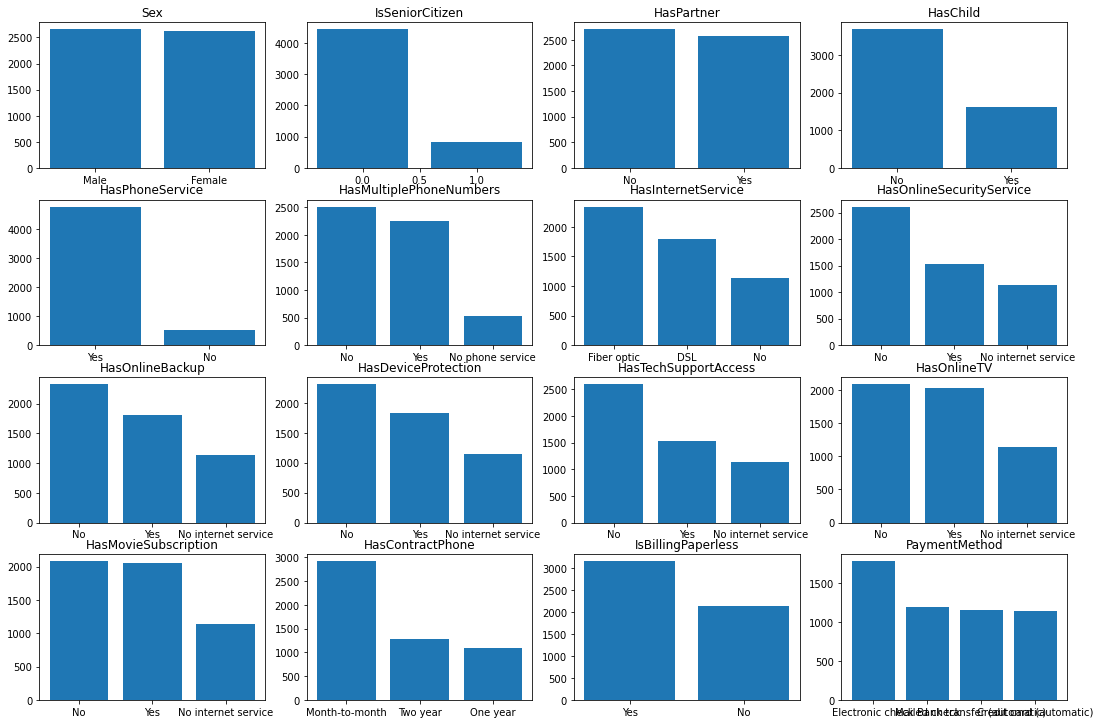

In [15]:
fig, axes = plt.subplots(4,4, figsize=(15,10))
fig.tight_layout()
i = 0
for row in axes:
  for col in row:
    col.bar(data[cat_cols[i]].value_counts().index, data[cat_cols[i]].value_counts().values )
    col.set_title(cat_cols[i])
    i += 1
plt.show()

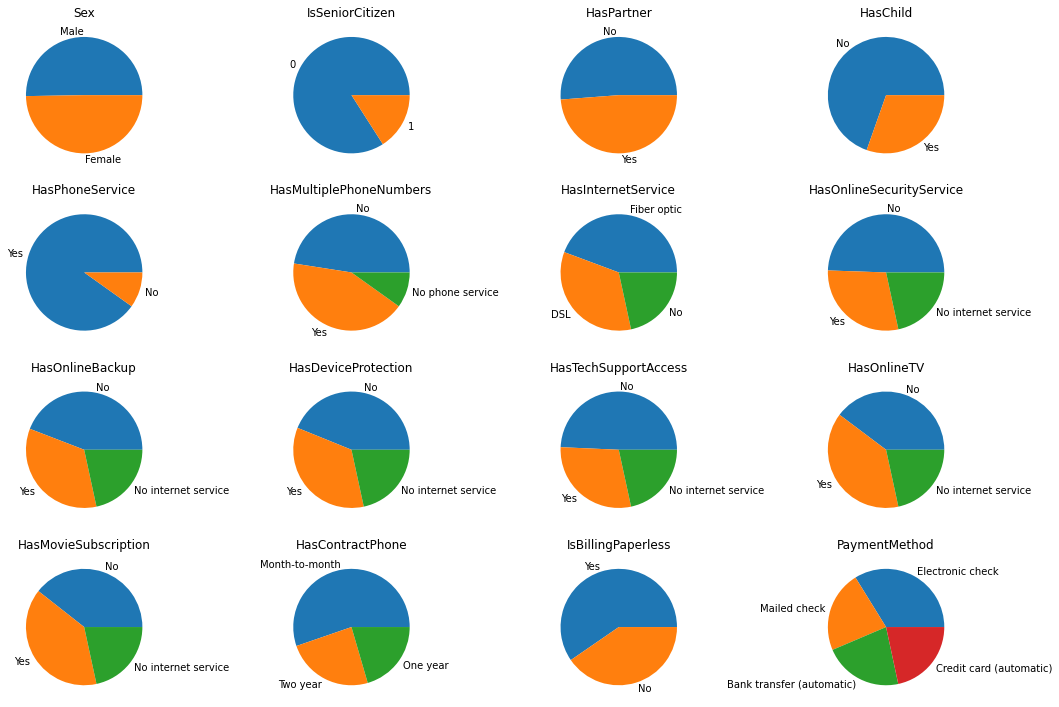

In [16]:
fig, axes = plt.subplots(4,4, figsize=(15,10))
fig.tight_layout()
i = 0
for row in axes:
  for col in row:
    col.pie(data[cat_cols[i]].value_counts().values, labels = data[cat_cols[i]].value_counts().index )
    col.set_title(cat_cols[i])
    i += 1
plt.show()

Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

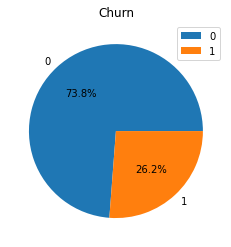

In [17]:
plt.pie(data.Churn.value_counts(), labels = data.Churn.value_counts().index,  autopct='%1.1f%%')
plt.legend()
plt.title('Churn')
plt.show()

Классы являются несбалансированными.

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [18]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

*Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.*

С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

In [20]:
# YOUR CODE
data_cat_dummies = pd.get_dummies(data[cat_cols])
scaler = StandardScaler()
data_num_scaled = pd.DataFrame(scaler.fit_transform(data[num_cols]), index = data[num_cols].index, columns = data[num_cols].columns)
X = pd.concat([data_num_scaled, data_cat_dummies], axis = 1)
y = data.Churn
X.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920781,-1.505447,-0.555906,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,1.613364,-1.294998,-0.183080,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,-1.279189,0.363737,-0.974836,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,-0.016244,0.476418,0.124489,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,1.124482,1.667856,1.970633,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

param_grid = {
    # "C" : [100, 10, 1, 0.1, 0.01, 0.001], 
    "penalty" : ["l1", "l2"]}
LR = LogisticRegressionCV();
classifier = GridSearchCV(LR, param_grid, cv=5, scoring='roc_auc', refit=True, n_jobs=-1, verbose =0);
classifier.fit(X_train, y_train);
print('The best score for Logistic Regression by GridSearchCV is ', classifier.best_score_)
print('The best parameters', classifier.best_params_)

The best score for Logistic Regression by GridSearchCV is  0.8475061161694996
The best parameters {'penalty': 'l2'}


In [22]:
# здесь попробовала закодировать категориальные признаки с помощью one-hot encoding; а потом отнормировать весь датасет, а не только числовые признаки
# YOUR CODE
data_cat_dummies = pd.get_dummies(data[cat_cols])
scaler = StandardScaler()
data_cat_enc = pd.concat([data[num_cols], data_cat_dummies], axis=1)
X_norm_all = pd.DataFrame(scaler.fit_transform(data_cat_enc), index = data_cat_enc.index, columns = data_cat_enc.columns)
y = data.Churn
X_norm_all.head()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.920781,-1.505447,-0.555906,-0.435476,-0.994713,0.994713,-1.024534,1.024534,-1.512917,1.512917,-0.330803,0.330803,1.050497,-0.330803,-0.861443,-0.718988,-0.892181,1.905065,-0.989079,1.905065,-0.638285,-0.889105,1.905065,-0.721717,-0.883997,1.905065,-0.726273,-0.986087,1.905065,-0.640636,-0.812060,1.905065,-0.793881,-0.806294,1.905065,-0.799596,-1.111864,1.970203,-0.565544,1.214563,-1.214563,-0.530194,-0.525503,-0.714751,1.850347
1,1.613364,-1.294998,-0.183080,-0.435476,-0.994713,0.994713,-1.024534,1.024534,0.660975,-0.660975,-0.330803,0.330803,-0.951930,-0.330803,1.160843,-0.718988,-0.892181,1.905065,-0.989079,1.905065,-0.638285,-0.889105,1.905065,-0.721717,-0.883997,1.905065,-0.726273,-0.986087,1.905065,-0.640636,-0.812060,1.905065,-0.793881,-0.806294,1.905065,-0.799596,-1.111864,-0.507562,1.768209,1.214563,-1.214563,-0.530194,1.902938,-0.714751,-0.540439
2,-1.279189,0.363737,-0.974836,-0.435476,-0.994713,0.994713,0.976053,-0.976053,0.660975,-0.660975,-0.330803,0.330803,1.050497,-0.330803,-0.861443,-0.718988,1.120848,-0.524916,1.011042,-0.524916,-0.638285,1.124726,-0.524916,-0.721717,1.131226,-0.524916,-0.726273,-0.986087,-0.524916,1.560950,1.231437,-0.524916,-0.793881,1.240243,-0.524916,-0.799596,0.899391,-0.507562,-0.565544,-0.823341,0.823341,-0.530194,-0.525503,1.399088,-0.540439
3,-0.016244,0.476418,0.124489,2.296336,1.005315,-1.005315,-1.024534,1.024534,0.660975,-0.660975,-0.330803,0.330803,-0.951930,-0.330803,1.160843,-0.718988,1.120848,-0.524916,1.011042,-0.524916,-0.638285,1.124726,-0.524916,-0.721717,-0.883997,-0.524916,1.376893,1.014109,-0.524916,-0.640636,1.231437,-0.524916,-0.793881,1.240243,-0.524916,-0.799596,0.899391,-0.507562,-0.565544,1.214563,-1.214563,-0.530194,-0.525503,-0.714751,1.850347
4,1.124482,1.667856,1.970633,-0.435476,1.005315,-1.005315,-1.024534,1.024534,-1.512917,1.512917,-0.330803,0.330803,-0.951930,-0.330803,1.160843,-0.718988,1.120848,-0.524916,-0.989079,-0.524916,1.566699,-0.889105,-0.524916,1.385585,-0.883997,-0.524916,1.376893,-0.986087,-0.524916,1.560950,-0.812060,-0.524916,1.259635,-0.806294,-0.524916,1.250631,-1.111864,-0.507562,1.768209,1.214563,-1.214563,-0.530194,1.902938,-0.714751,-0.540439


In [23]:
# тоже самое только если весь датасет будет отнормирован
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_norm_all, y, train_size = 0.7, random_state = 42)

param_grid = {
    # "C" : [100, 10, 1, 0.1, 0.01, 0.001], 
    "penalty" : ["l1", "l2"]}
LR = LogisticRegressionCV();
classifier_2 = GridSearchCV(LR, param_grid, cv=5, scoring='roc_auc', refit=True);
classifier_2.fit(X_train_2, y_train_2);
print('The best score for Logistic Regression by GridSearchCV is ', classifier_2.best_score_)
print('The best parameters', classifier_2.best_params_)

The best score for Logistic Regression by GridSearchCV is  0.8478513178434642
The best parameters {'penalty': 'l2'}


In [48]:
# более сложный вариант
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {
    "logisticregression__C" : [100, 10, 1, 0.1, 0.01, 0.001], 
    # "penalty" : ["l1", "l2"]
    }

classifier_3 = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose =0)
classifier_3.fit(X_train_2, y_train_2);
print('The best score for Logistic Regression by GridSearchCV is ', classifier_3.best_score_)
print('The best parameters', classifier_3.best_params_)


The best score for Logistic Regression by GridSearchCV is  0.8497030043077164
The best parameters {'logisticregression__C': 100}


*Выпишите какое лучшее качество и с какими параметрами вам удалось получить*

In [25]:
print('The best score for Logistic Regression by GridSearchCV is ', classifier_3.best_score_)
print('The best parameters', classifier_3.best_params_)

The best score for Logistic Regression by GridSearchCV is  0.8497030043077164
The best parameters {'logisticregression__C': 100}


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [26]:
# YOUR CODE
!pip install catboost

import catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 76.4 MB 25 kB/s 


In [27]:
data_cat = data.copy()
y_cat = data_cat['Churn']
data_cat = data_cat.drop(['Churn'], axis=1)
X_cat = data_cat
X_train_, X_valid, y_train_, y_valid = train_test_split(X_cat, y_cat, test_size=0.7, random_state=42)

In [33]:
data.shape

(5282, 20)

In [34]:
cat_model_1 = CatBoostClassifier(iterations=100, learning_rate = 0.7)
cat_model_1.fit(X_train_, y_train_, cat_features=cat_cols, verbose=False);
y_cat_pred = cat_model_1.predict(X_valid)


print('The best score for Catboost classifier ', roc_auc_score(y_valid, y_cat_pred))
# print('The best parameters', classifier_3.best_params_))

The best score for Catboost classifier  0.7152349239786674


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [35]:
best_model = classifier_3

In [55]:
X_test = pd.read_csv('/content/drive/MyDrive/Deep_learning_school/Part8 - HW/14. Домашнее задание. Решение ML-задачи и kaggle/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Deep_learning_school/Part8 - HW/14. Домашнее задание. Решение ML-задачи и kaggle/submission.csv')

submission['Churn'] = pd.DataFrame(best_model.predict(X_test_2))
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.